# US Police shootings analysis

This dataset contains data about the shootings that took place in USA from year 2015 to 2020. It contains data like the date of shooting, the weapon used, the mental state of the attacker wheather he/she was mentally ill or not, gender, age of the attacker etc. I got this dataset from Kaggle.

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

This dataset contains data about the shootings that took place in USA from year 2015 to 2020. It contains data like the date of shooting, the weapon used, the mental state of the attacker wheather he/she was mentally ill or not, gender, age of the attacker etc. I got this dataset from Kaggle.

In [89]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [90]:
dataset_url = 'https://www.kaggle.com/ahsen1330/us-police-shootings' 

In [91]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ishan06
Your Kaggle Key: ········


100%|██████████| 126k/126k [00:00<00:00, 26.5MB/s]

The dataset has been downloaded and extracted.

In [92]:
data_dir = './us-police-shootings'

In [93]:
import os
os.listdir(data_dir)

['shootings.csv']

Let us save and upload our work to Jovian before continuing.

In [94]:
project_name = "us-shooting-analysis-project" # change this (use lowercase letters and hyphens only)

In [95]:
!pip install jovian --upgrade -q

In [96]:
import jovian

In [97]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ishaanchugh06/us-shooting-analysis-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ishaanchugh06/us-shooting-analysis-project


'https://jovian.ml/ishaanchugh06/us-shooting-analysis-project'

## Data Preparation and Cleaning

In this section, we will look at the dataset. We will replace the missing and faulty values and prepare the dataset for visualization.



In [98]:
import pandas as pd
import numpy as np

In [99]:
shootings_data=pd.read_csv(data_dir + '/shootings.csv')
shootings_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [129]:
shootings_data['date'] = pd.to_datetime(shootings_data['date'], format="%Y-%m-%d")

In [130]:
shootings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     4895 non-null   object        
 1   date                     4895 non-null   datetime64[ns]
 2   manner_of_death          4895 non-null   object        
 3   armed                    4895 non-null   object        
 4   age                      4895 non-null   float64       
 5   gender                   4895 non-null   object        
 6   race                     4895 non-null   object        
 7   city                     4895 non-null   object        
 8   state                    4895 non-null   object        
 9   signs_of_mental_illness  4895 non-null   bool          
 10  threat_level             4895 non-null   object        
 11  flee                     4895 non-null   object        
 12  body_camera              4895 non-

In [ ]:
shootings_data=shootings_data.drop(['id'],axis=1)

In [132]:
shootings_data.describe()

,age
count,4895.000000
mean,36.549750
std,12.694348
min,6.000000
25%,27.000000
50%,35.000000
75%,45.000000
max,91.000000


In [104]:
shootings_data

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [105]:
import jovian

In [106]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ishaanchugh06/us-shooting-analysis-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ishaanchugh06/us-shooting-analysis-project


'https://jovian.ml/ishaanchugh06/us-shooting-analysis-project'

## Exploratory Analysis and Visualization

In this section, we will explore different columns of the data and draw some visualizations.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [107]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

We will see the total cases by year.

In [123]:
shootings_data['date'] = pd.to_datetime(shootings_data.date)

In [124]:
shootings_data['date']

0      2015-01-02
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-04
          ...    
4890   2020-06-12
4891   2020-06-12
4892   2020-06-13
4893   2020-06-13
4894   2020-06-15
Name: date, Length: 4895, dtype: datetime64[ns]

In [156]:
shootings_data['year'] = pd.DatetimeIndex(shootings_data.date).year
shootings_data['month'] = pd.DatetimeIndex(shootings_data.date).month
shootings_data['day'] = pd.DatetimeIndex(shootings_data.date).day
shootings_data['weekday'] = pd.DatetimeIndex(shootings_data.date).weekday
shootings_data['count']=shootings_data.age/shootings_data.age

In [143]:
shootings_data

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category,year,month,day,weekday,count
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns,2015,1,2,4,1.0
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns,2015,1,2,4,1.0
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed,2015,1,3,5,1.0
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects,2015,1,4,6,1.0
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects,2015,1,4,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices,2020,6,12,4,1.0
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns,2020,6,12,4,1.0
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed,2020,6,13,5,1.0
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns,2020,6,13,5,1.0


In [144]:
total_shootings_by_year=shootings_data.groupby('year')['count'].sum()

In [145]:
total_shootings_by_year

year
2015    965.0
2016    904.0
2017    906.0
2018    888.0
2019    858.0
2020    374.0
Name: count, dtype: float64

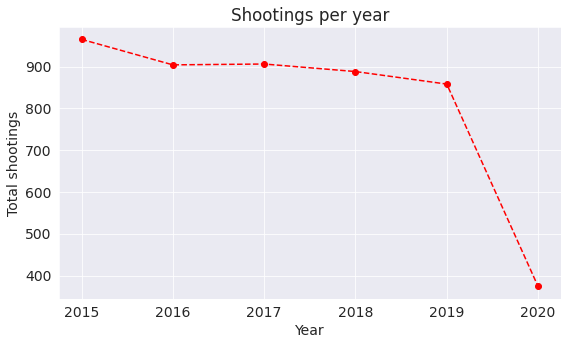

In [274]:
plt.plot(total_shootings_by_year,'o--r');
plt.xlabel('Year');
plt.ylabel('Total shootings');
plt.title('Shootings per year');

We can deduce from the above visualization that the crime rate has decreased over the years.

In [157]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ishaanchugh06/us-shooting-analysis-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ishaanchugh06/us-shooting-analysis-project


'https://jovian.ml/ishaanchugh06/us-shooting-analysis-project'

We will explore which gender is more involved in shootings

In [231]:
convicts_m=shootings_data[shootings_data['gender']=='M']
convicts_f=shootings_data[shootings_data['gender']=='F']

In [278]:
male_convicts=convicts_m['count'].sum()
male_convicts

4673.0

In [279]:
female_convicts=convicts_f['count'].sum()
female_convicts

222.0

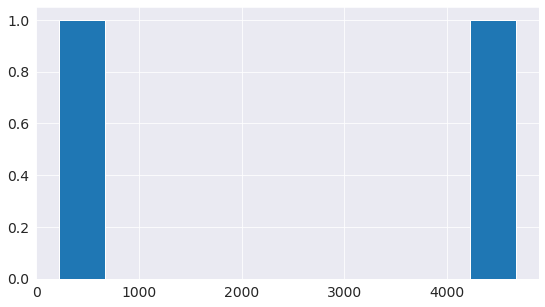

In [280]:
plt.hist([male_convicts,female_convicts]);

We can see that number of female convicts is less than the male convicts.

We will see which weapons were used.

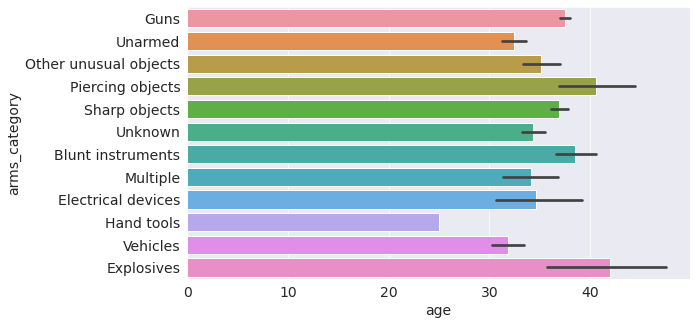

In [256]:
sns.barplot('age','arms_category',data=shootings_data);

The above graph shows that the explosives are the most common item used by the convicts.

We will explore which gender shows more signs of mental illness

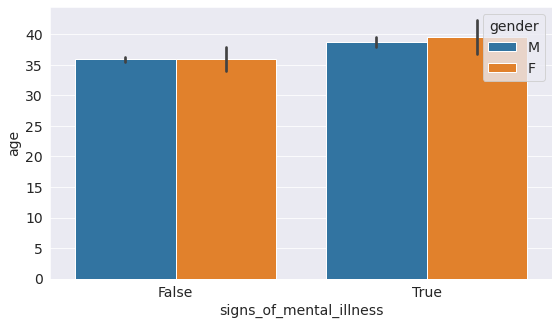

In [273]:
sns.barplot('signs_of_mental_illness','age',hue='gender',data=shootings_data);

We can see that female convicts show more signs of mental illness than male convicts.

We will see which race is more aggressive

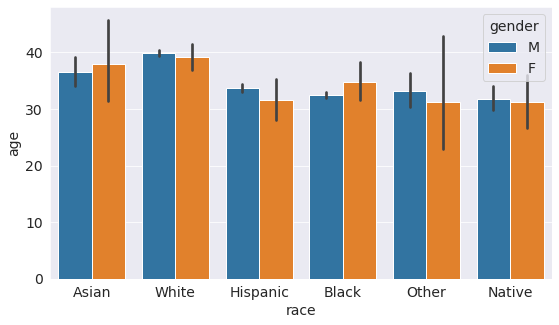

In [270]:
sns.barplot('race','age',hue='gender',data=shootings_data);

From the above visualization, it is clear that males of White ethnicity constitute for the most number of convicts in the US shootings.

Let us save and upload our work to Jovian before continuing

In [281]:
import jovian

In [282]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ishaanchugh06/us-shooting-analysis-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ishaanchugh06/us-shooting-analysis-project


'https://jovian.ml/ishaanchugh06/us-shooting-analysis-project'

## Asking and Answering Questions

Let's try to answer some questions here.



#### Q1: Which state has the least number of cases?

In [175]:
state_wise=(shootings_data.groupby('state')['count'].sum())

In [263]:
state_wise.sort_values(ascending=True)

state
RI      4.0
VT      8.0
DE     10.0
ND     11.0
NH     12.0
WY     13.0
DC     13.0
SD     14.0
CT     20.0
ME     21.0
NE     24.0
MT     29.0
HI     29.0
IA     31.0
MA     33.0
AK     36.0
ID     37.0
WV     46.0
KS     49.0
UT     58.0
NJ     60.0
MN     60.0
MS     61.0
MI     71.0
AR     73.0
OR     76.0
MD     77.0
SC     80.0
NV     85.0
KY     87.0
WI     88.0
NY     90.0
IN     91.0
VA     92.0
NM     93.0
PA     95.0
AL     95.0
IL     99.0
LA    102.0
MO    124.0
TN    125.0
WA    126.0
OH    146.0
NC    148.0
OK    151.0
GA    161.0
CO    168.0
AZ    222.0
FL    324.0
TX    426.0
CA    701.0
Name: count, dtype: float64

From the Above series, we can deduce that RI has the least number of cases.

#### Q2: What is the gender wise crime rate?

In [246]:
convicts=shootings_data.groupby(['gender','year'])['count'].sum()

In [247]:
convicts

gender  year
F       2015     41.0
        2016     38.0
        2017     40.0
        2018     48.0
        2019     40.0
        2020     15.0
M       2015    924.0
        2016    866.0
        2017    866.0
        2018    840.0
        2019    818.0
        2020    359.0
Name: count, dtype: float64

We can see that Female convicts are more or less constant but the number of male convicts has reduced over the years.

#### Q3:Which are the 3 most used arms category?

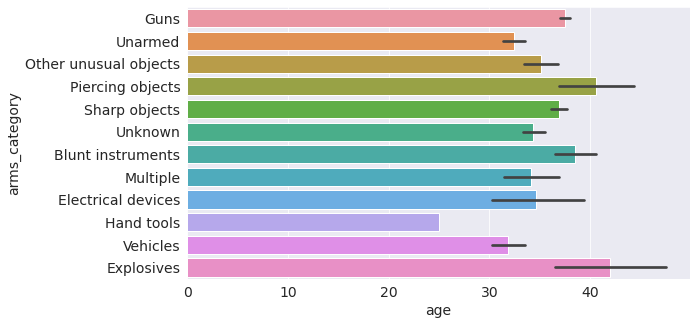

In [283]:
sns.barplot('age','arms_category',data=shootings_data);

1st is Explosives.
2nd is Piercing Objects
3rd is Guns.

#### Q4: Which ethnicity constitute for most number of convicts?

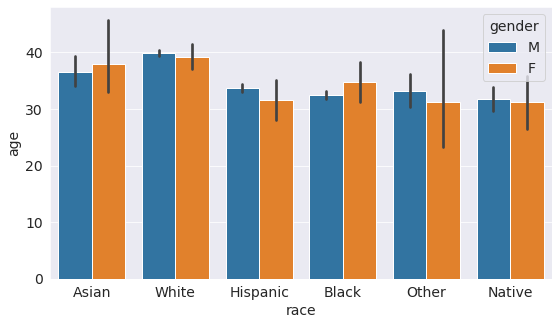

In [284]:
sns.barplot('race','age',hue='gender',data=shootings_data);

It is clear that males of White ethnicity constitute for the most number of convicts in the US shootings.

#### Q5: Which gender shows more signs of mental illness?

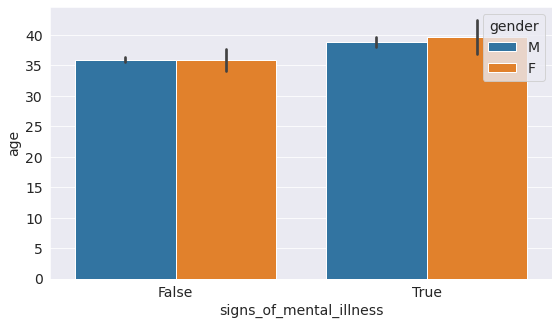

In [285]:
sns.barplot('signs_of_mental_illness','age',hue='gender',data=shootings_data);

Female convicts show more signs of mental illness than male convicts.

Let us save and upload our work to Jovian before continuing.

In [286]:
import jovian

In [287]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ishaanchugh06/us-shooting-analysis-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ishaanchugh06/us-shooting-analysis-project


'https://jovian.ml/ishaanchugh06/us-shooting-analysis-project'

## Inferences and Conclusion

From the given data, we can see that 
* The crime rate has decreased over the years.
* The most used weapon category was explosives.
* The crime rate for females has remained more or less constant over the years but for males, it has decreased.
* Female convicts show more signs of mental illness than male convicts.
* Males of White ethnicity constitute for most of the crimes in the US shootings.

In [ ]:
import jovian

In [ ]:
jovian.commit()

## References and Future Work

Using the data from this dataset, we can reduce the availability of most commonly used weapons like the explosives and guns and laws can be framed accordingly to reduce these types of cases in future.

In [288]:
import jovian

In [289]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "ishaanchugh06/us-shooting-analysis-project" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/ishaanchugh06/us-shooting-analysis-project


'https://jovian.ml/ishaanchugh06/us-shooting-analysis-project'